# The Spark Foundation

### Task 1 : Prediction using supervised ML
### Rajaram Khatik

### Problem : Predict the percentage of an student based on the no. of study hours.

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the dataset

In [2]:
dataset = pd.read_csv("Data.csv")

### Getting insights about the data

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
dataset.shape

(25, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking missing data

In [17]:
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


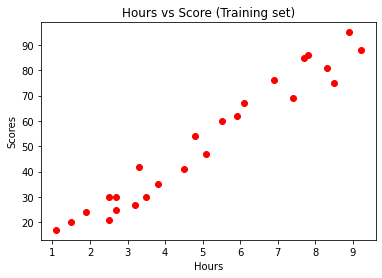

In [3]:
plt.scatter(dataset['Hours'], dataset['Scores'], color = "red")
plt.title("Hours vs Score (Training set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

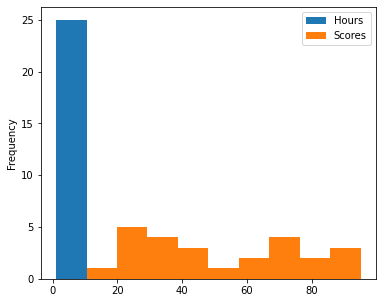

In [4]:
dataset.plot(kind='hist', figsize=(6,5))
plt.show()

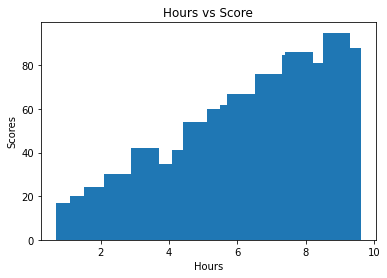

In [5]:
plt.bar(dataset.Hours, dataset.Scores)
plt.title("Hours vs Score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

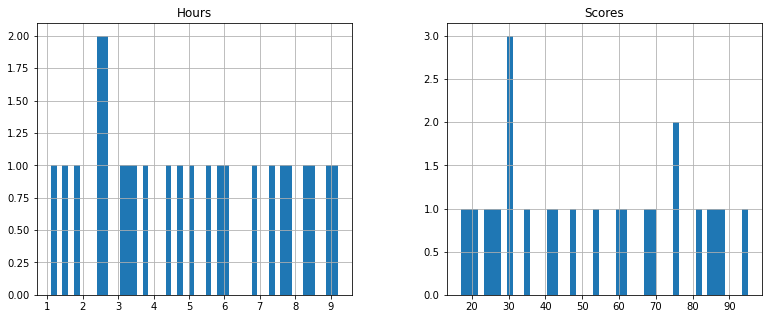

In [6]:
dataset.hist(bins = 50, figsize = (13,5))
plt.show()

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Fitting Linear Regression to the dataset

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the test set results

In [11]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Real' : y_test , 'Predicted' : y_pred})
df

,Real,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Plotting the curve of real and predicted values

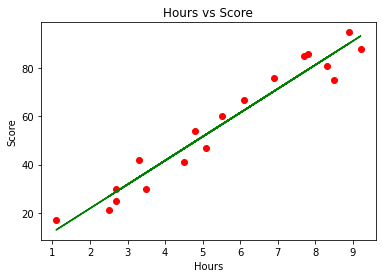

In [14]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Hours vs Score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [20]:
#no of hours is given equals to 9.25 hours
hours = 9.25
print("Number of hours = {}".format(hours))
y_predict = regressor.predict([[hours]])
print("The score will be equal to {}".format(y_predict[0]))

Number of hours = 9.25
The score will be equal to 93.89272889341655


### Evaluating the performance of the model

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error = {}".format(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error = {}".format(mean_absolute_error(y_test, y_pred)))

Mean Squared Error = 20.33292367497997
Mean Absolute Error = 4.130879918502486


### Conclusion : The predicted score of a student who studies for 9.25 hrs/ day is equals to 93.89
